In [ ]:
import os, sys
sys.path.insert(1, os.getcwd()+'/..')
if (os.getcwd()[-9:] == 'tutorials'):
    os.chdir('../..')

import mspc_pca
from src.msa import generate
from src.msa.visualization import plot
from src.msa.feature_extraction import features
import numpy as np
import matplotlib.pyplot as plt

ImportError: cannot import name 'generate' from 'src.msa' (/home/gsus/Documentos/GitHub/MESA/src/msa/__init__.py)

Generate the signal

In [ ]:
sr = 400
T = 8

t0=1
A = 11.2
b = 1.7
w_k = 2*np.pi * 10
phi = .0


t = np.linspace(0, T, int(T*sr))
# signal = generator.generate_pulse(A,b,t0,t,w_k,phi)
signal = generate.generate_chirp(A,5,20,sr,T,0.0)


win_length = .4 #s 
win_samples = int(win_length*sr)
shift = 0.1 #s
hop = int(shift*sr)

time, freq, Sxx = features.spectrogram(signal, sr, win_samples, hop,"boxcar", "odd", t_phase =win_length/2, )

Sxx.shape

(81, 83)

Plot signal and spectrogram

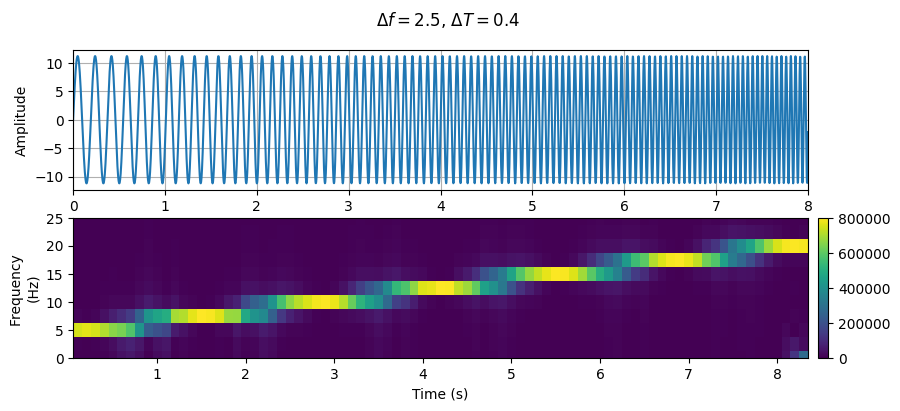

In [ ]:

fig, ax = plt.subplots(2,1, figsize=(10,4))
_,ax[0] = plot.signal(t, signal, ax=ax[0])
_, ax[1], mesh =plot.spectrogram(time, freq, Sxx,logscale=False, ax=ax[1], ylim=(0,25))

fig.suptitle(fr"$\Delta f = {1/win_length}$, $\Delta T = {win_length}$")
ax[0].set_ylabel("Amplitude", )
ax[1].set_ylabel("Frequency \n(Hz)", )
ax[1].set_xlabel("Time (s)", )
fig.subplots_adjust(right=0.86)
tbox = ax[0].get_position()
bbox = ax[1].get_position()
cbar_ax = fig.add_axes([0.87, bbox.y0, 0.01, bbox.height])
cbar = fig.colorbar(mesh, cax=cbar_ax)

MEDA

In [ ]:
from mspc_pca.pca import *
from mspc_pca.omeda import *
from mspc_pca.mspc import *
from mspc_pca.ckf import *

In [ ]:
data = Sxx.T
print(data.shape)

freqs = [f"{round(x,2)} Hz" for x in freq]
times = [f"{round(x,2)} s"  for x in time]

print(freqs)

(83, 81)
['0.0 Hz', '2.5 Hz', '5.0 Hz', '7.5 Hz', '10.0 Hz', '12.5 Hz', '15.0 Hz', '17.5 Hz', '20.0 Hz', '22.5 Hz', '25.0 Hz', '27.5 Hz', '30.0 Hz', '32.5 Hz', '35.0 Hz', '37.5 Hz', '40.0 Hz', '42.5 Hz', '45.0 Hz', '47.5 Hz', '50.0 Hz', '52.5 Hz', '55.0 Hz', '57.5 Hz', '60.0 Hz', '62.5 Hz', '65.0 Hz', '67.5 Hz', '70.0 Hz', '72.5 Hz', '75.0 Hz', '77.5 Hz', '80.0 Hz', '82.5 Hz', '85.0 Hz', '87.5 Hz', '90.0 Hz', '92.5 Hz', '95.0 Hz', '97.5 Hz', '100.0 Hz', '102.5 Hz', '105.0 Hz', '107.5 Hz', '110.0 Hz', '112.5 Hz', '115.0 Hz', '117.5 Hz', '120.0 Hz', '122.5 Hz', '125.0 Hz', '127.5 Hz', '130.0 Hz', '132.5 Hz', '135.0 Hz', '137.5 Hz', '140.0 Hz', '142.5 Hz', '145.0 Hz', '147.5 Hz', '150.0 Hz', '152.5 Hz', '155.0 Hz', '157.5 Hz', '160.0 Hz', '162.5 Hz', '165.0 Hz', '167.5 Hz', '170.0 Hz', '172.5 Hz', '175.0 Hz', '177.5 Hz', '180.0 Hz', '182.5 Hz', '185.0 Hz', '187.5 Hz', '190.0 Hz', '192.5 Hz', '195.0 Hz', '197.5 Hz', '200.0 Hz']


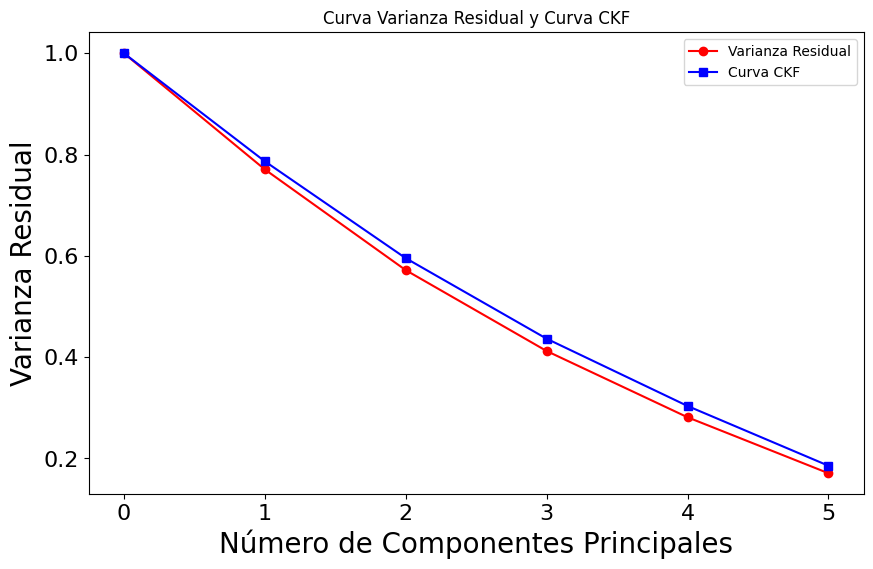

In [ ]:

pca_resvar(Sxx, 5);


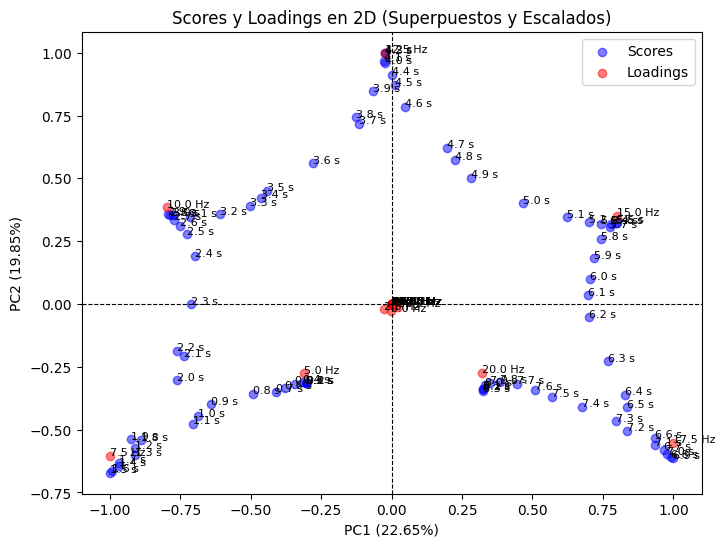

In [ ]:

data_fit, pca = adjust_PCA(data, 4, False)
combine_plots(data_fit, 0, 1, pca,times, freqs)

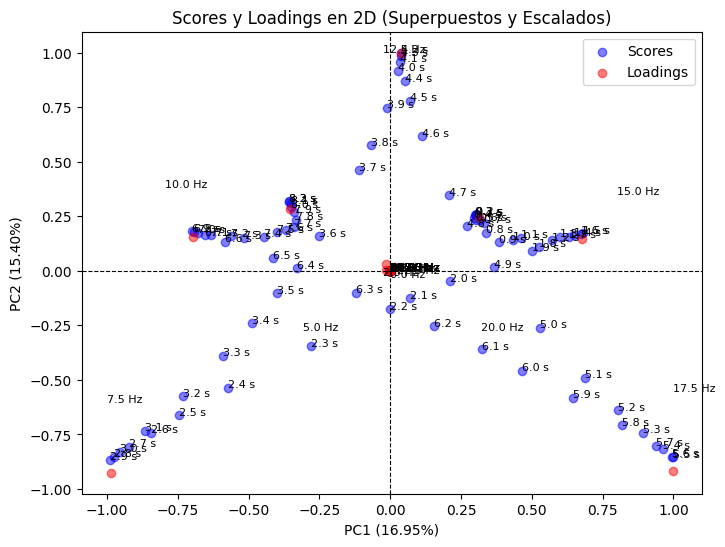

In [ ]:
combine_plots(data_fit, 2, 3, pca,times, freqs)

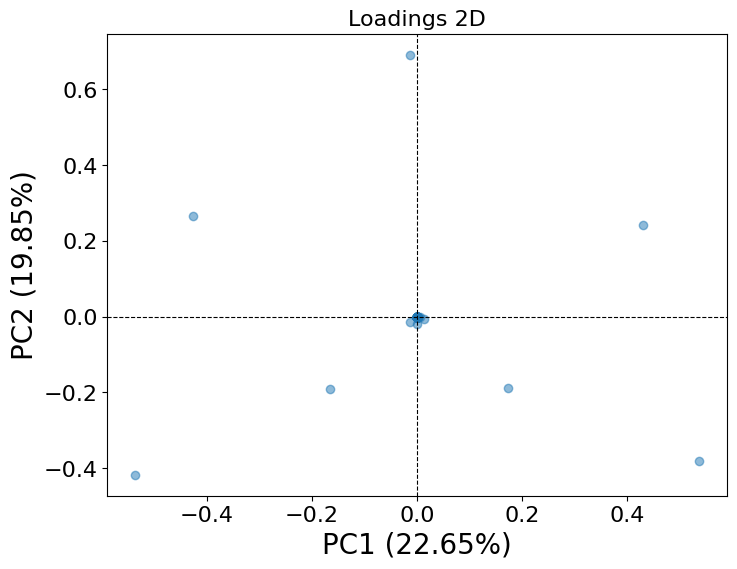

In [ ]:
plot_loadings_2d(1,2,pca )